c:\Users\Jayashrinidhi V\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


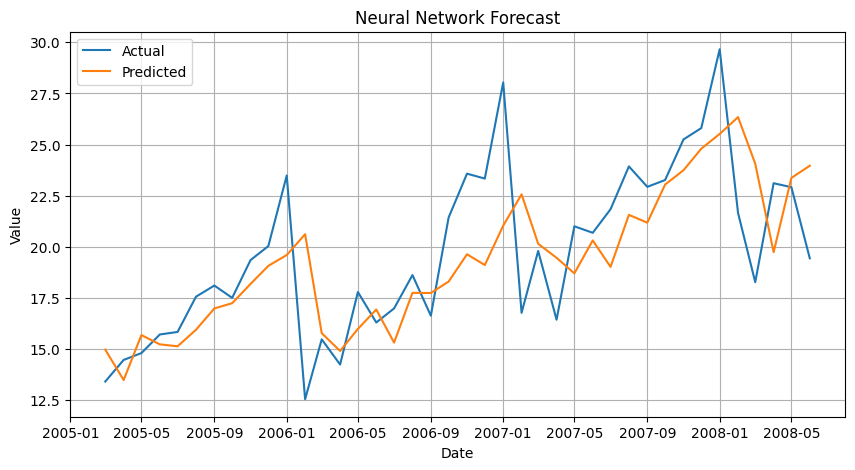

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

# 1. Load dataset
data = pd.read_csv('sale.csv', parse_dates=['date'], index_col='date')
series = data['value'].values.reshape(-1, 1)

# 2. Normalize data
scaler = MinMaxScaler()
scaled_series = scaler.fit_transform(series)

# 3. Create supervised learning format
def create_sequences(data, n_steps):
    X, y = [], []
    for i in range(len(data) - n_steps):
        X.append(data[i:i+n_steps])
        y.append(data[i+n_steps])
    return np.array(X), np.array(y)

n_steps = 5
X, y = create_sequences(scaled_series, n_steps)

# 4. Train/test split
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# 5. Build model
model = Sequential([
    Dense(64, activation='relu', input_shape=(n_steps,)),
    Dense(64, activation='relu'),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse')

# 6. Train model
early_stop = EarlyStopping(patience=10, restore_best_weights=True)
model.fit(X_train.reshape(X_train.shape[0], -1), y_train,
          validation_data=(X_test.reshape(X_test.shape[0], -1), y_test),
          epochs=100, batch_size=8, callbacks=[early_stop], verbose=0)

# 7. Forecast
y_pred = model.predict(X_test.reshape(X_test.shape[0], -1))
y_pred_inv = scaler.inverse_transform(y_pred)
y_test_inv = scaler.inverse_transform(y_test)

# 8. Plot original vs predicted
plt.figure(figsize=(10, 5))
plt.plot(data.index[-len(y_test):], y_test_inv, label='Actual')
plt.plot(data.index[-len(y_test):], y_pred_inv, label='Predicted')
plt.title('Neural Network Forecast')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()


c:\Users\Jayashrinidhi V\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/stepWARNING:tensorflow:6 out of the last 6 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x00000231AD9088B0> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


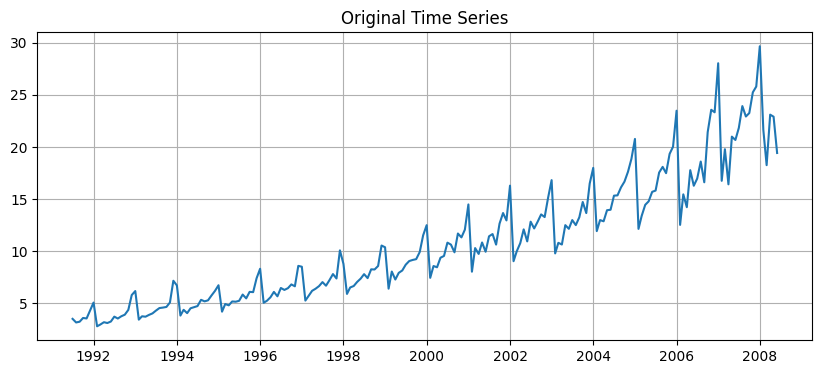

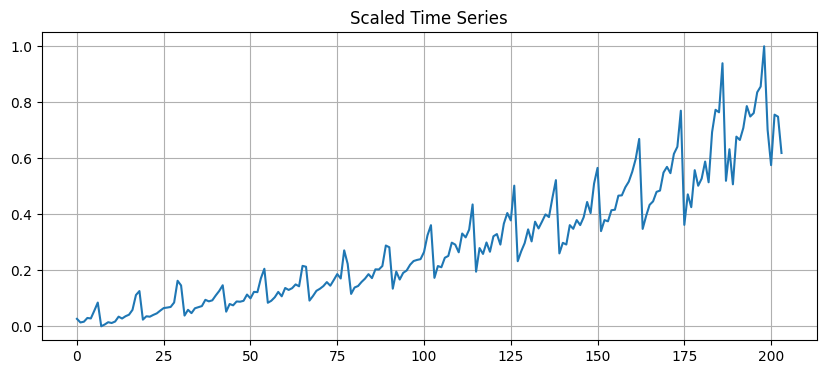

<Figure size 800x400 with 0 Axes>

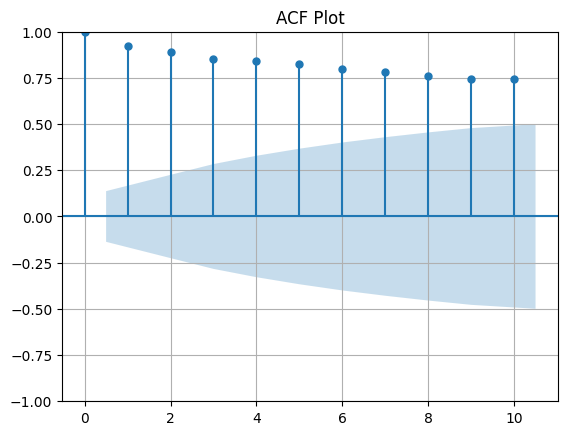

<Figure size 800x400 with 0 Axes>

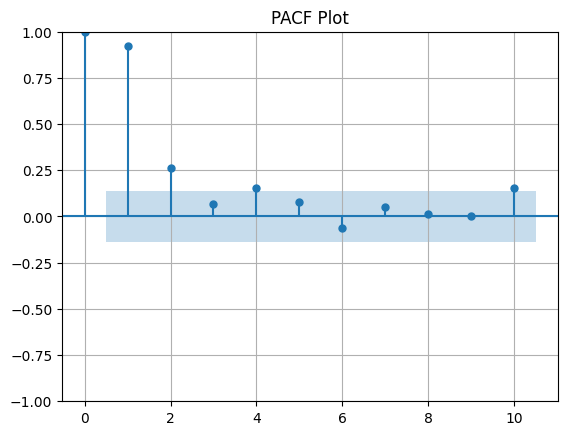

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# 1. Load dataset
series = data['value'].values.reshape(-1, 1)

# 2. Normalize
scaler = MinMaxScaler()
scaled_series = scaler.fit_transform(series)

# 3. Convert to supervised learning format
def create_sequences(data, n_steps):
    X, y = [], []
    for i in range(len(data) - n_steps):
        X.append(data[i:i+n_steps])
        y.append(data[i+n_steps])
    return np.array(X), np.array(y)

n_steps = 5
X, y = create_sequences(scaled_series, n_steps)

# 4. Train-test split
split = int(len(X) * 0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# 5. Build model
model = Sequential([
    Dense(64, activation='relu', input_shape=(n_steps,)),
    Dense(64, activation='relu'),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse')

# 6. Train model
early_stop = EarlyStopping(patience=10, restore_best_weights=True)
model.fit(X_train.reshape(X_train.shape[0], -1), y_train,
          validation_data=(X_test.reshape(X_test.shape[0], -1), y_test),
          epochs=100, batch_size=8, verbose=0, callbacks=[early_stop])

# 7. Predict
y_pred = model.predict(X_test.reshape(X_test.shape[0], -1))
y_pred_inv = scaler.inverse_transform(y_pred)
y_test_inv = scaler.inverse_transform(y_test)

# -----------------------
# 🔍 5 Plots
# -----------------------

# 1. Original Time Series
plt.figure(figsize=(10, 4))
plt.plot(data.index, data['value'], label='Original')
plt.title('Original Time Series')
plt.grid(True)
plt.show()

# 2. Scaled Time Series
plt.figure(figsize=(10, 4))
plt.plot(scaled_series, label='Scaled')
plt.title('Scaled Time Series')
plt.grid(True)
plt.show()

# 3. ACF Plot
plt.figure(figsize=(8, 4))
plot_acf(data['value'], lags=10)
plt.title('ACF Plot')
plt.grid(True)
plt.show()

# 4. PACF Plot
plt.figure(figsize=(8, 4))
plot_pacf(data['value'], lags=10)
plt.title('PACF Plot')
plt.grid(True)
plt.show()

